<div style="text-align:center"><span style="font-size:2em; font-weight: bold;">Lecture 9—Clustering</span></div>

# $k$-Means clustering

In [3]:
import numpy as np
import pandas as pd
from cleands import *

Data Generating Process

In [4]:
x1 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(500,5))
x2 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(500,5))
x3 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(500,5))
x = np.vstack((x1,x2,x3))
shuffle = np.random.permutation(x.shape[0])
x = x[shuffle,:]
membership = shuffle.copy()
for i in range(len(membership)):
    if membership[i]<500: membership[i]=0
    elif membership[i]<1000: membership[i]=1
    else: membership[i]=2
np.unique(membership,return_counts=True)
membership

array([0, 0, 2, ..., 1, 2, 1])

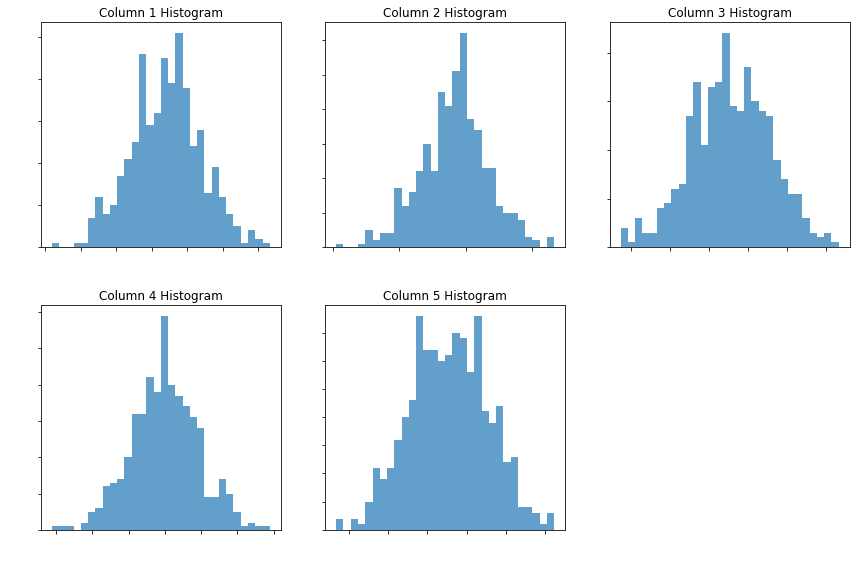

In [19]:
# Plotting multiple histograms for each column
num_cols = x1.shape[1]  # Number of columns in x1

plt.figure(figsize=(12, 8))

for i in range(num_cols):
    plt.subplot(2, 3, i+1)  # Creating subplots in a 2x3 grid
    plt.hist(x1[:, i], bins=30, alpha=0.7)
    plt.title(f'Column {i+1} Histogram')
    plt.xlabel('Values', color='white')
    plt.ylabel('Frequency', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')

plt.tight_layout()
plt.show()

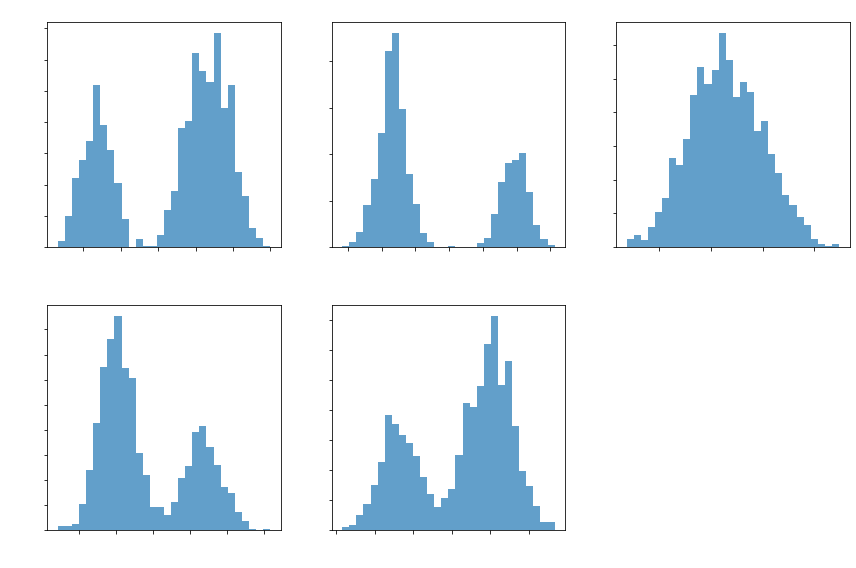

In [25]:
# Plotting multiple histograms for each column
num_cols = x.shape[1]  # Number of columns in x1

plt.figure(figsize=(12, 8))

for i in range(num_cols):
    plt.subplot(2, 3, i+1)  # Creating subplots in a 2x3 grid
    plt.hist(x[:, i], bins=30, alpha=0.7)
    plt.title(f'Column {i+1} Histogram',color='white')
    plt.xlabel('Values', color='white')
    plt.ylabel('Frequency', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')

plt.tight_layout()
plt.show()

Calculate means of membership variable

In [3]:
means = []
for i in range(3):
    mean = x[membership==i,:].mean(0)
    means += [mean]
means = np.array(means)
means

array([[ 0.07473829, -1.46576221, -1.77997172,  3.59406824,  0.39906022],
       [-4.8519648 , -0.14017139, -3.67194459,  0.43281038,  3.90529695],
       [-0.90518685,  1.67362511, -3.71893765, -1.8042325 , -3.87938496]])

In [4]:
x

array([[-3.20135771,  0.77784142, -4.35997717,  1.34726963,  4.2101925 ],
       [ 1.97953202, -0.5496859 , -3.36262993,  3.53888856,  0.27340355],
       [ 0.79933247, -1.44107696, -3.36419841,  2.45837713,  1.85080785],
       ...,
       [-1.82425385,  2.34943935, -3.01669283, -1.93736237, -3.68858166],
       [ 1.21099094,  1.16280702, -4.30442668,  0.08063115, -3.87067891],
       [-0.74559147,  0.88815183, -2.12522102, -1.45099547, -2.25000814]])

kmeans step 1: randomly guess

In [7]:
k = 3
n = x.shape[0]
group = np.random.randint(k,size=(n,))
group

array([1, 2, 1, ..., 1, 0, 1])

kmeans step 2: calculate means of each cluster

In [17]:
means = []
for i in range(k):
    mean = x[group==i,:].mean(0)
    means += [mean]
means = np.array(means)
means

array([[-4.8519648 , -0.14017139, -3.67194459,  0.43281038,  3.90529695],
       [ 0.07473829, -1.46576221, -1.77997172,  3.59406824,  0.39906022],
       [-0.90518685,  1.67362511, -3.71893765, -1.8042325 , -3.87938496]])

kmeans step 3: group each point to its closest mean

In [16]:
dists = []
for i in range(k):
    dist = x-means[i,:]
    dist = (dist**2).sum(1)
    dists += [dist]
dists = np.array(dists)
group = dists.argmin(0)
group

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

kmeans step 4: go back to step 2 until converges...

Putting it all together:

In [39]:
k = 3
n = x.shape[0]
max_iters = 100
newgroup = np.random.randint(k,size=(n,))
group = np.zeros((n,))
for j in range(max_iters):
    if (group==newgroup).all(): break
    print('iteration')
    group = newgroup
    dists = []
    for i in range(k):
        mean = x[group==i,:].mean(0)
        dist = x-mean
        dist = (dist**2).sum(1)
        dists += [dist]
    dists = np.array(dists)
    newgroup = dists.argmin(0)
group

iteration
iteration
iteration
iteration


array([2, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
(membership==group).mean()

0.0

Confusion matrix

In [41]:
membershipohe = np.zeros((membership.size, membership.max()+1))
membershipohe[np.arange(membership.size),membership] = 1
groupohe = np.zeros((group.size, group.max()+1))
groupohe[np.arange(group.size),group] = 1
membershipohe.T@groupohe

array([[  0., 500.,   0.],
       [  0.,   0., 500.],
       [500.,   0.,   0.]])

accuracy

In [42]:
(membershipohe.T@groupohe).max(1).sum()/groupohe.sum()

1.0

putting all this in a function

In [43]:
def kmeans(x,k,max_iters=100,seed=None):
    n = x.shape[0]
    if seed != None: np.random.seed(seed)
    newgroup = np.random.randint(k,size=(n,))
    group = np.zeros((n,))
    for j in range(max_iters):
        if (group==newgroup).all(): break
        #print('iteration')
        group = newgroup
        dists = []
        for i in range(k):
            mean = x[group==i,:].mean(0)
            dist = x-mean
            dist = (dist**2).sum(1)
            dists += [dist]
        dists = np.array(dists)
        newgroup = dists.argmin(0)
    return newgroup

Total within sum of squares calculation

In [47]:
k = 5
group = kmeans(x,k)
means = np.array([x[group==i,:].mean(0) for i in range(k)])
wss = [((x[group==i,:]-means[i,:])**2).sum() for i in range(k)]
total_wss = sum(wss)
total_wss

6873.813485534158

Loop process and get min twss

In [48]:
def rep_kmeans(x,k,max_iters=100,seed=None,n_start=100):
    twss = []
    groups = []
    for i in range(n_start):
        group = kmeans(x,k,max_iters,seed)
        means = np.array([x[group==i,:].mean(0) for i in range(k)])
        wss = [((x[group==i,:]-means[i,:])**2).sum() for i in range(k)]
        total_wss = sum(wss)
        groups += [group]
        twss += [total_wss]
    group = groups[np.array(twss).argmin()]
    return group

In [51]:
k = 10
group = rep_kmeans(x,k,n_start=250)
means = np.array([x[group==i,:].mean(0) for i in range(k)])
wss = [((x[group==i,:]-means[i,:])**2).sum() for i in range(k)]
total_wss = sum(wss)
total_wss

C:\Users\jason\AppData\Local\Temp\ipykernel_26076\2381808098.py:12: RuntimeWarning: Mean of empty slice.
  mean = x[group==i,:].mean(0)
C:\Users\jason\AppData\Local\Temp\ipykernel_26076\253577756.py:6: RuntimeWarning: Mean of empty slice.
  means = np.array([x[group==i,:].mean(0) for i in range(k)])


5502.564673041889

Automatic elbow detector

In [52]:
def auto_kmeans(x,k_max=10,max_iters=100,seed=None,n_start=100):
    groups = []
    twss = []
    for k in range(1,k_max):
        group = rep_kmeans(x,k,max_iters,seed,n_start)
        means = np.array([x[group==i,:].mean(0) for i in range(k)])
        wss = [((x[group==i,:]-means[i,:])**2).sum() for i in range(k)]
        total_wss = sum(wss)
        groups += [group]
        twss += [total_wss]
    twss = np.array(twss)
    dwss = -np.diff(twss)
    dwss = np.insert(dwss,0,dwss.sum()/np.log(k_max))
    dwss = np.trim_zeros(dwss)
    ratio = dwss[:-1]/dwss[1:]
    ratio = ratio[:k_max]
    k = ratio.argmax()
    return groups[k]

In [53]:
result = auto_kmeans(x)
np.unique(result)

C:\Users\jason\AppData\Local\Temp\ipykernel_26076\2381808098.py:12: RuntimeWarning: Mean of empty slice.
  mean = x[group==i,:].mean(0)
C:\Users\jason\AppData\Local\Temp\ipykernel_26076\253577756.py:6: RuntimeWarning: Mean of empty slice.
  means = np.array([x[group==i,:].mean(0) for i in range(k)])


array([0, 1, 2], dtype=int64)

In [54]:
membershipohe = np.zeros((membership.size, membership.max()+1))
membershipohe[np.arange(membership.size),membership] = 1
resultohe = np.zeros((result.size, result.max()+1))
resultohe[np.arange(result.size),result] = 1
membershipohe.T@resultohe

array([[500.,   0.,   0.],
       [  0., 500.,   0.],
       [  0.,   0., 500.]])

In [56]:
(membershipohe.T@resultohe).max(1).sum()/membershipohe.sum()

1.0

# Programming challenges

## Quick sort

Write a program which implements the quick sort algorithm.



## $k$-Means class structure

Write a class structure for our k-means code
